## Support vector machine

#### What's SVM?

- Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

- Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

#### What's it advantage?

        SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, 
        gene classification, and in web pages. This is one of the reasons we use SVMs in machine learning. 
        It can handle both classification and regression on linear and non-linear data.

#### Pros and cons?

- Advantages

        SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm. They also use less memory because they use a subset of training points in the decision phase. SVM works well with a clear margin of separation and with high dimensional space.

- Disadvantages

        SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes. It works poorly with overlapping classes and is also sensitive to the type of kernel used.


#### How it's work?

- The main objective is to segregate the given dataset in the best possible way. The distance between the either nearest points is known as the margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

        Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

        Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure.

#### Input and output?


#### When to use it?




In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold



from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd




In [9]:
canner_bunch = datasets.load_breast_cancer(as_frame=True)
canner_df = canner_bunch.frame
canner_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [10]:
canner_bunch.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(canner_bunch.data, canner_bunch.target, test_size=.3, random_state=16)

In [12]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# from sklearn.cluster

SVC(kernel='linear')

In [13]:
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9590643274853801

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test, target_names=['Breast cancer', 'not cancer']))

               precision    recall  f1-score   support

Breast cancer       0.92      0.97      0.94        62
   not cancer       0.98      0.95      0.97       109

     accuracy                           0.96       171
    macro avg       0.95      0.96      0.96       171
 weighted avg       0.96      0.96      0.96       171



In [15]:
confusion_matrix(y_test, y_pred)

array([[ 60,   5],
       [  2, 104]])

In [16]:
# using cross_validate when we want to scoring more than one score metric
# you need to make the score using make_scorer function below to do it.

scoring = {
    'precision' : make_scorer(precision_score, average='weighted'),
    'recall' : make_scorer(recall_score, average='weighted'),
    'f1_score' : make_scorer(f1_score, average='weighted'),
    'accuracy_score' : make_scorer(accuracy_score)
}

pd.DataFrame(cross_validate(model, #model for prediction
                            canner_bunch.data, #X
                            canner_bunch.target, #y
                            cv=5, # using stratifiedKfold right here
                            scoring=scoring, # 
                            return_train_score=False # return a set of score applying on the training set
                            ))

,fit_time,score_time,test_precision,test_recall,test_f1_score,test_accuracy_score
0,0.694166,0.028737,0.951470,0.947368,0.946462,0.947368
1,1.923864,0.020964,0.930832,0.929825,0.929074,0.929825
2,1.140077,0.031162,0.973711,0.973684,0.973616,0.973684
3,0.672965,0.031955,0.920798,0.921053,0.920849,0.921053
4,1.150290,0.023046,0.957722,0.955752,0.956038,0.955752


In [17]:
# this one is cross_val_score it can only monitor one scores at the time, single metrics is permitted

cross_val_score(model, canner_bunch.data, canner_bunch.target, cv=5,scoring='accuracy')

array([0.94736842, 0.92982456, 0.97368421, 0.92105263, 0.95575221])

In [18]:
# # Using cross_validate vs stratifiedKFold in combine if you don't like using default cross_validate strategy anymore
# # 


# stratified_cv = StratifiedKFold(n_splits=5, shuffle=True,random_state=42)

# pd.DataFrame(cross_validate(model, # model  for cross validation
#                             canner_bunch.data, # X
#                             canner_bunch.target,  # y
#                             cv=stratified_cv, # cross validate
#                             scoring=['accuracy'], # the default was enough
#                             return_train_score=True))




,fit_time,score_time,test_accuracy,train_accuracy
0,0.639324,0.007972,0.947368,0.964835
1,0.741450,0.007228,0.929825,0.973626
2,0.988724,0.011259,0.956140,0.962637
3,1.496055,0.009445,0.938596,0.969231
4,0.708608,0.006970,0.964602,0.960526


In [26]:
from sklearn.datasets import make_circles


In [34]:
X, y = make_circles(n_samples=300, noise=0.1, random_state=16)

SyntaxError: positional argument follows keyword argument (2718459957.py, line 1)

In [32]:
import matplotlib.pyplot as plt 

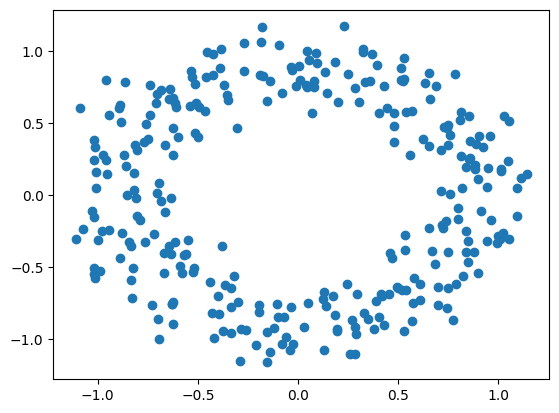

In [33]:

plt.scatter(X[:,0], X[:,1])